In [1]:
import mlrose_ky as mlrose
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.model_selection import learning_curve, LearningCurveDisplay, validation_curve, ValidationCurveDisplay
from sklearn.metrics import accuracy_score
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load Data

In [16]:
train_df = pd.read_csv('../datasets/cleaned_data/mkt_camp_v1/train.csv')
target_column = "Response"
y_train = train_df[target_column]
X_train = train_df.drop(columns=[target_column])

test_df = pd.read_csv('../datasets/cleaned_data/mkt_camp_v1/test.csv')
y_test = test_df[target_column]
X_test = test_df.drop(columns=[target_column])


# Hyperparameter Tuning

# RHC

In [20]:
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='random_hill_climb',
    max_iters=100,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    restarts=10,
    curve=True,
    random_state=42
)

Text(0.5, 1.0, 'RHC: Varying Restart')

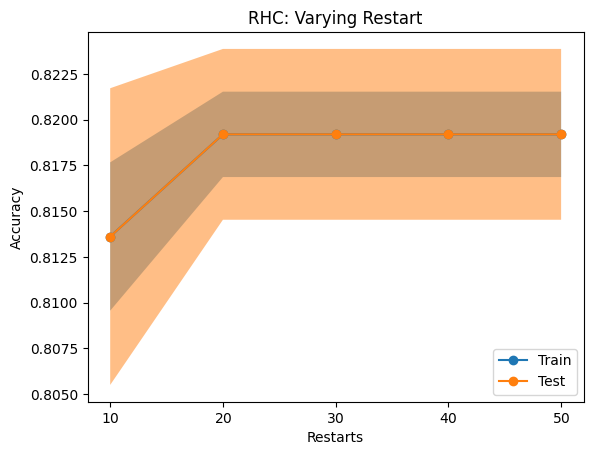

In [21]:
restarts = [10, 20, 30, 40, 50]

rhc_train_pop_size, rhc_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="restarts",
                                                        param_range=restarts, 
                                                        cv=3, 
                                                        scoring="accuracy",
                                                        n_jobs=-1)

display = ValidationCurveDisplay(param_name='Restarts',
                                 param_range=np.array(restarts),
                                 train_scores=rhc_train_pop_size,
                                 test_scores=rhc_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=restarts)
plt.title("RHC: Varying Restart")

# SA

Text(0.5, 1.0, 'SA: Varying Temperature')

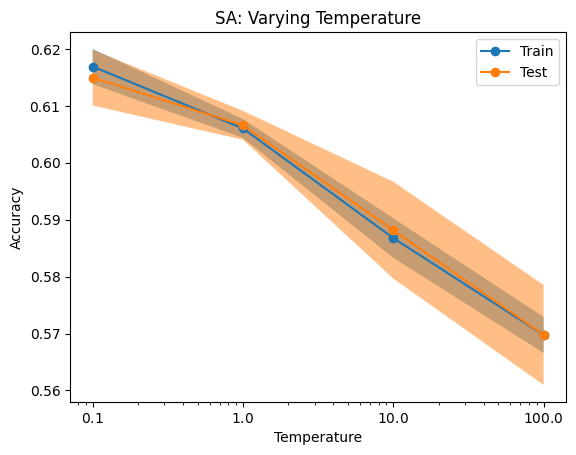

In [32]:
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='simulated_annealing',
    max_iters=1000,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    schedule=mlrose.GeomDecay(init_temp=1, decay=0.999, min_temp=0.00001),
    curve=True,
    random_state=44
)

schedule = [mlrose.GeomDecay(init_temp=0.1, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=1, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=10, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=100, decay=0.999, min_temp=0.00001)]

sa_train_pop_size, sa_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="schedule",
                                                        param_range=schedule,
                                                        cv=3,
                                                        scoring="accuracy",
                                                        n_jobs=-1)

display = ValidationCurveDisplay(param_name='Temperature',
                                 param_range=np.array([0.1, 1, 10, 100]),
                                 train_scores=sa_train_pop_size,
                                 test_scores=sa_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=[0.1, 1, 10, 100])
plt.title("SA: Varying Temperature")


Text(0.5, 1.0, 'SA: Varying Temperature')

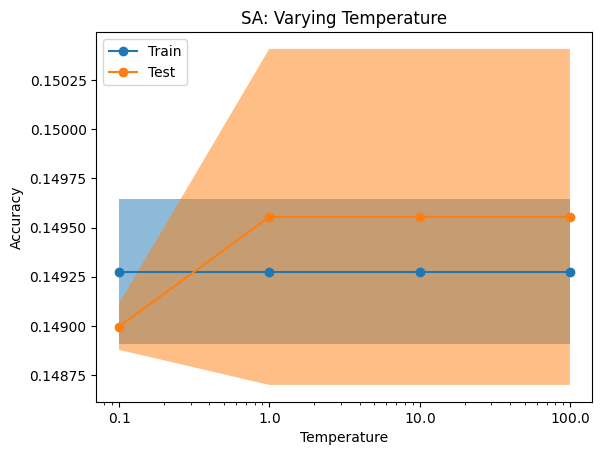

In [35]:
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='simulated_annealing',
    max_iters=1000,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    schedule=mlrose.GeomDecay(init_temp=1, decay=0.999, min_temp=0.00001),
    curve=True,
    random_state=42
)

schedule = [mlrose.GeomDecay(init_temp=0.1, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=1, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=10, decay=0.999, min_temp=0.00001),
            mlrose.GeomDecay(init_temp=100, decay=0.999, min_temp=0.00001)]

sa_train_pop_size, sa_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="schedule",
                                                        param_range=schedule,
                                                        cv=3,
                                                        scoring="accuracy",
                                                        n_jobs=-1)

display = ValidationCurveDisplay(param_name='Temperature',
                                 param_range=np.array([0.1, 1, 10, 100]),
                                 train_scores=sa_train_pop_size,
                                 test_scores=sa_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=[0.1, 1, 10, 100])
plt.title("SA: Varying Temperature")

# GA

In [ ]:
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='genetic_alg',
    max_iters=100,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    pop_size=100,
    mutation_prob=0.2,
    curve=True,
    random_state=42
)

Text(0.5, 1.0, 'GA: Varying population sizes')

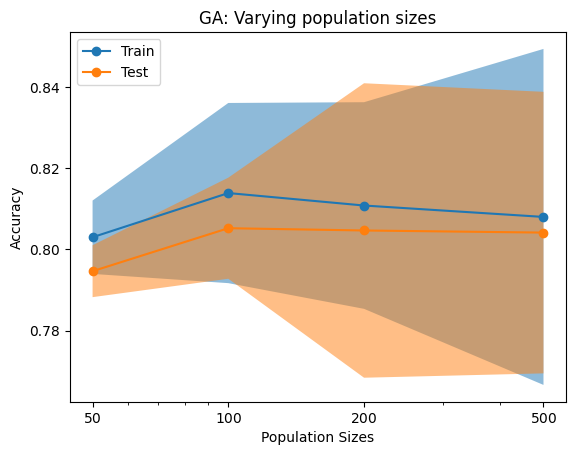

In [4]:
pop_sizes = [50, 100, 200, 500]

ga_train_pop_size, ga_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="pop_size",
                                                        param_range=pop_sizes, 
                                                        cv=3, 
                                                        scoring="accuracy",
                                                        n_jobs=-1)

display = ValidationCurveDisplay(param_name='Population Sizes',
                                 param_range=np.array(pop_sizes),
                                 train_scores=ga_train_pop_size,
                                 test_scores=ga_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=pop_sizes)
plt.title("GA: Varying population sizes")

Text(0.5, 1.0, 'GA: Varying mutation probability')

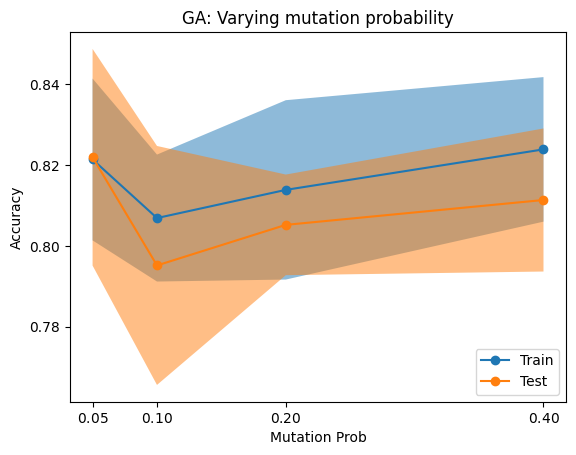

In [6]:
mutation_prob = [0.05, 0.1, 0.2, 0.4]

ga_train_pop_size, ga_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="mutation_prob",
                                                        param_range=mutation_prob, 
                                                        cv=3, 
                                                        scoring="accuracy",
                                                        n_jobs=-1)

display = ValidationCurveDisplay(param_name='Mutation Prob',
                                 param_range=np.array(mutation_prob),
                                 train_scores=ga_train_pop_size,
                                 test_scores=ga_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=mutation_prob)
plt.title("GA: Varying mutation probability")

# Learning curve

In [36]:
nn_rhc_final = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='random_hill_climb',
    max_iters=100,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    restarts=20,
    curve=True,
    random_state=42
)

nn_sa_final = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='simulated_annealing',
    max_iters=1000,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    schedule=mlrose.GeomDecay(init_temp=0.2, decay=0.999, min_temp=0.00001),
    curve=True,
    random_state=42
)

nn_ga_final = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='genetic_alg',
    max_iters=300,
    bias=True,
    is_classifier=True,
    early_stopping=False,
    clip_max=5,
    pop_size=100,
    mutation_prob=0.05,
    curve=True,
    random_state=42
)

Text(0.5, 1.0, 'RHC: Learning Curve')

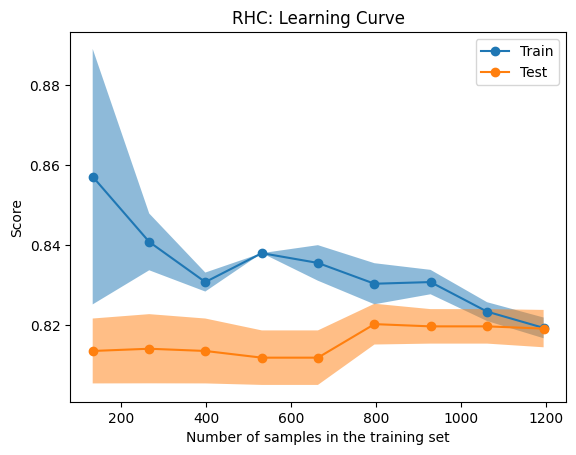

In [30]:
train_size, train_score, valid_score = learning_curve(estimator=nn_rhc_final,
                                                      X=X_train,
                                                      y=y_train,
                                                      random_state=42,
                                                      train_sizes=np.linspace(.001,1,10),
                                                      cv=3,
                                                      n_jobs=-1)

display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.title("RHC: Learning Curve")

Text(0.5, 1.0, 'SA: Learning Curve')

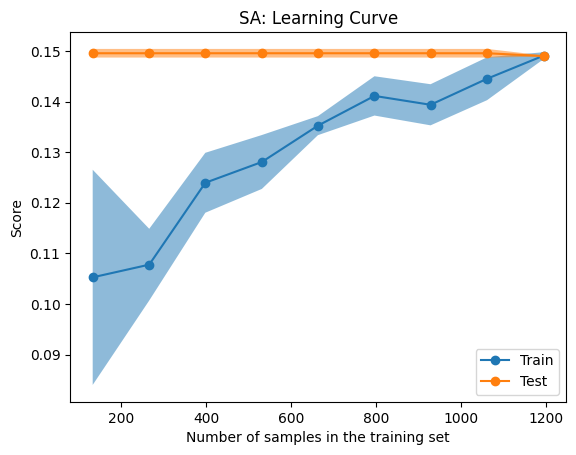

In [8]:
train_size, train_score, valid_score = learning_curve(estimator=nn_sa_final,
                                                      X=X_train,
                                                      y=y_train,
                                                      random_state=42,
                                                      train_sizes=np.linspace(.001,1,10),
                                                      cv=3,
                                                      n_jobs=-1)

display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.title("SA: Learning Curve")

Text(0.5, 1.0, 'GA: Learning Curve')

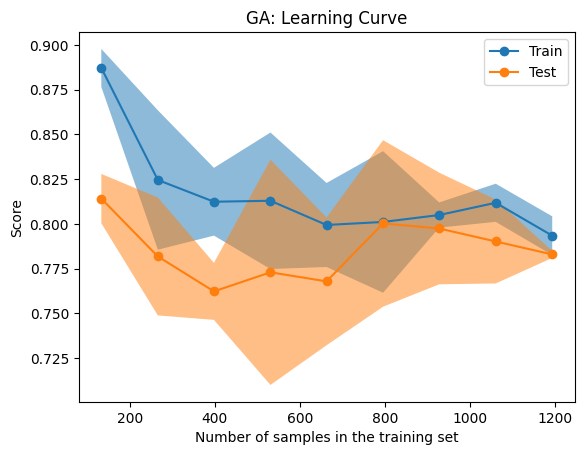

In [10]:
train_size, train_score, valid_score = learning_curve(estimator=nn_ga_final,
                                                      X=X_train,
                                                      y=y_train,
                                                      random_state=42,
                                                      train_sizes=np.linspace(.001,1,10),
                                                      cv=3,
                                                      n_jobs=-1)

display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")

param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.title("GA: Learning Curve")

# Loss curve

Text(0.5, 0, 'Training Iteration')

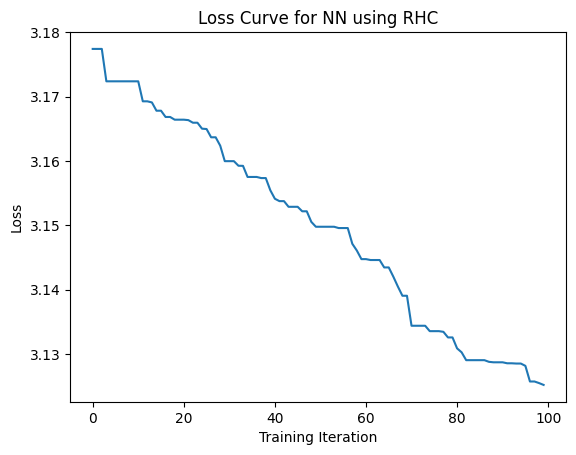

In [34]:
nn_rhc_final.fit(X_train, y_train)
plt.plot(np.arange(len(nn_rhc_final.fitness_curve)),nn_rhc_final.fitness_curve[:,0])
plt.title("Loss Curve for NN using RHC")
plt.ylabel('Loss')
plt.xlabel('Training Iteration')

Text(0.5, 0, 'Training Iteration')

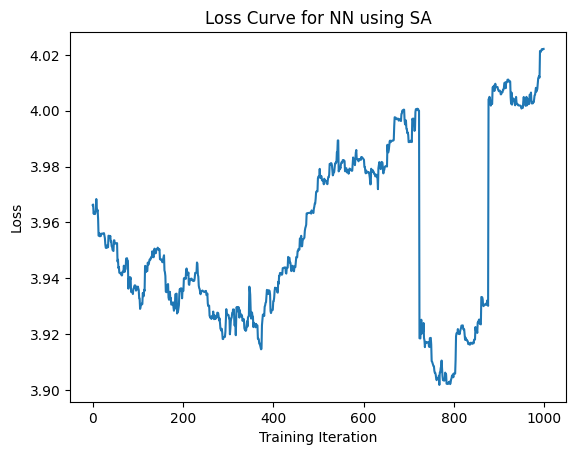

In [36]:
nn_sa_final.fit(X_train, y_train)
plt.plot(np.arange(len(nn_sa_final.fitness_curve)),nn_sa_final.fitness_curve[:,0])
plt.title("Loss Curve for NN using SA")
plt.ylabel('Loss')
plt.xlabel('Training Iteration')

Text(0.5, 0, 'Training Iteration')

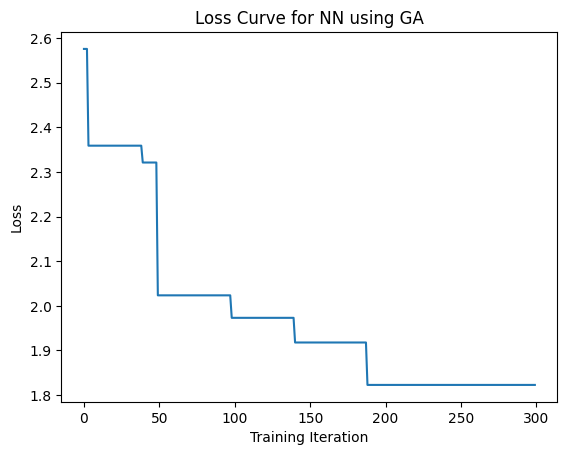

In [37]:
nn_ga_final.fit(X_train, y_train)
plt.plot(np.arange(len(nn_ga_final.fitness_curve)),nn_ga_final.fitness_curve[:,0])
plt.title("Loss Curve for NN using GA")
plt.ylabel('Loss')
plt.xlabel('Training Iteration')

# Test Set Performance

In [40]:
nn_rhc_final.fit(X_train, y_train)
y_pred = nn_rhc_final.predict(X_test)

y_pred_labels = y_pred.flatten()
accuracy = np.mean(y_pred_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8281


In [41]:
nn_sa_final.fit(X_train, y_train)
y_pred = nn_sa_final.predict(X_test)

y_pred_labels = y_pred.flatten()
accuracy = np.mean(y_pred_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.1540


In [39]:
nn_ga_final.fit(X_train, y_train)
y_pred = nn_ga_final.predict(X_test)

y_pred_labels = y_pred.flatten()
accuracy = np.mean(y_pred_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7835
